#**Preamble**

In [2]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/ML/TermProject

Mounted at /content/drive
/content/drive/My Drive/ML/TermProject


In [3]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#**Clustering Task**

#(a) Brief Exploration:# 
Carry out a brief exploration of the dataset, such as the number of samples, the number of raw features, the fraction of missing values (if any), the number of categorical variables
(if any), histograms of different variables, etc. This exploration should be accompanied with detailed
commentary in markdown cells.

In [32]:
# load data
df_demographic = pd.read_csv('demographic.csv')
df_diet = pd.read_csv('diet.csv')
df_exam = pd.read_csv('examination.csv')
df_labs = pd.read_csv('labs.csv')
df_questionnaire = pd.read_csv('questionnaire.csv')

# concatenate into single dataframe
df = pd.concat([df_demographic, df_diet, df_exam, df_labs, df_questionnaire], axis = 1) 
print(f'Dataframe dimensions: {df.shape}')
df.head(5)

Dataframe dimensions: (10175, 1816)


,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,...,NaN,NaN,180.0,190.0,70.0,228.0,35.0,NaN,NaN,NaN
3,73560,8,2,1,9,NaN,3,3,1.0,119.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0
4,73561,8,2,2,73,NaN,3,3,1.0,NaN,...,NaN,NaN,150.0,135.0,67.0,170.0,60.0,NaN,NaN,NaN


 We have concatenated the 5 different dataframes of different information. The final dataframe has 1816 features for 10175 samples.

#(b) Pre-processing:# 
Carry out preprocessing of each dataset, which should be guided by your exploration of the dataset as well as your forthcoming plans for the datasets. This preprocessing could involve, e.g., replacement of invalid entries with plausible values, centering of the data, standardization of the data, encoding of categorical variables, etc. All of the preprocessing steps should be fully motivated and justified in markdown cells.

In the following code block, we perform the following operations:
- create a dataframe that shows the percentage of null values in each column of *df*
- select the columns that contain more than 70% null values and remove them from *df*
- select the columns that contain object datatypes and remove them from *df*
- select the columns that contain between 0.5% and 70% null values, and replace the null values with the mean of each column
- keep the columns that contain less than 0.5% null values, and drop the rows of *df* that contain these null values

In [6]:
# data cleaning
null = 100*(df.isnull().sum())/(df.shape[0])
df_null = pd.DataFrame({'percentage' : null})
# df_null

df_high = df_null[df_null['percentage'] > 70]
df.drop(list(df_high.index), axis = 1, inplace = True)
# print(df.dtypes.unique())

df_type = pd.DataFrame({'type' : df.dtypes})
df_object = df_type[df_type['type'] == 'object']
df.drop(list(df_object.index), axis = 1, inplace = True)

null = 100*(df.isnull().sum())/(df.shape[0])
df_null = pd.DataFrame({'percentage' : null})

df_medium = df_null[(df_null['percentage'] < 70) & (df_null['percentage'] > 0.5)] 

for x in list(df_medium.index):
  df[x] = df[x].fillna(df[x].mean())

df.dropna(axis = 0, inplace = True)
df.shape

(9777, 753)

In [7]:
# check whether the dataframe still contains null values
new=[]
for x in list(df.isnull().sum().values):
  if x != 0:
    print(x)
  else:
    new.append(x)
print(new)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [8]:
# all the null values are removed and the data is clean
print(df.dtypes.unique())

[dtype('float64') dtype('int64')]


The pre-processed dataset consists of 9777 samples and 753 features as we curtailed the dataframe of redundant data.

#(c) Feature Extraction / Feature Learning:#
Depending on the dataset, engage in either feature engineering or feature learning for that dataset. In the case of text dataset, e.g, this would involve transforming the raw text into numerical features. In the case of large images or correlated numerical variables, e.g., this could involve using something like principal component analysis (PCA) to reduce the dimensionality of images or to decorrelate different variables. All of the steps involved in this feature extraction / feature learning component should be fully motivated and justified in markdown cells.


The number of columns is 753, therefore, we will use Principal Component Analysis (PCA) as a dimensionality-reduction technique.

At first, we need to scale the data before performing PCA on it. We will use the StandardScaler method from skicit-learn which basically standardizes features by removing the mean and scaling to unit variance.

In [9]:
# nirmalization of data
scaler = StandardScaler()
scaler.fit(df)

scaled_df = scaler.transform(df)
scaled_df.shape

(9777, 753)

We will now perform PCA on the whole dataframe to find the optimal number of Principal Components (PC) i.e. components which capture the greatest amount of variance in the data.

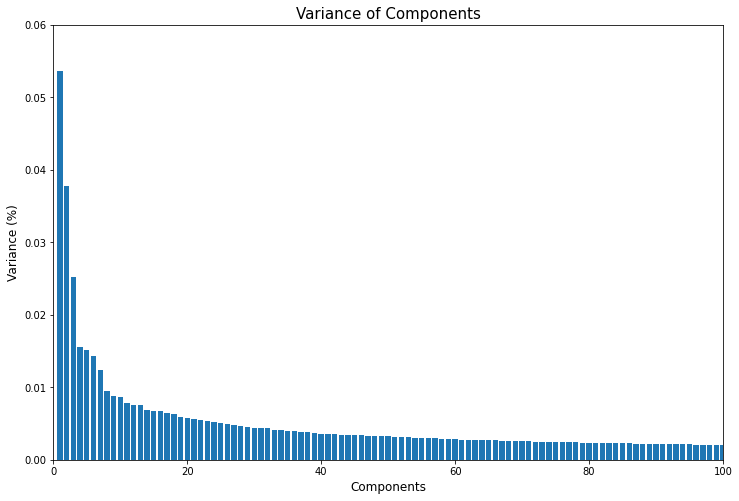

In [10]:
# apply PCA
pca = PCA()
pca.fit(scaled_df)

# plot the variance explained by PCA
x = list(range(1, 754))
plt.figure(figsize=(12,8))
plt.bar(x, pca.explained_variance_ratio_)
plt.xlabel('Components', fontsize=12)
plt.ylim(0, 0.06)
plt.xlim(0, 100)
plt.ylabel('Variance (%)', fontsize=12)
plt.title('Variance of Components', fontsize=15)
plt.show(); 

There is a variance drop off at number of components = 3. So, the first three components explain the majority of the variance in our data. Thus, we reduce the dimensionality by PCA using only 3 components.

In [11]:
pca3 = PCA(n_components=3)
pca3.fit(scaled_df)
X_pca = pca3.transform(scaled_df)
X_pca.shape

(9777, 3)

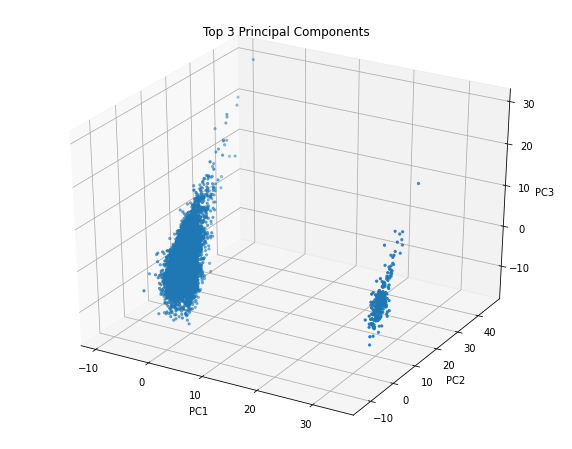

In [12]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = X_pca[:,0]
y = X_pca[:,1]
z = X_pca[:,2]

ax.scatter(x, y, z, marker='.', cmap='Blues')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ax.set_title('Top 3 Principal Components')

plt.show();

This scatterplot shows the variance of our dataset along the top three principal components

#(d) Processing dataset using two different machine learning methods:#

Carry out the declared task on each dataset using two different machine learning methods, with the parameters for each method (where applicable) carefully tuned using cross-validation, the results averaged over multiple validation
folds, and the final results presented in an aesthetically pleasing manner. In addition, use markdown cells to justify different steps in your implementations and explain different aspects of the three methods as much as possible.

**1. K-means Clustering**

The first clustering technique we implement on our dataset it *k-means*. The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing the *inertia* (within-cluster sum-of-squares). This algorithm requires the number of clusters to be specified. So we need to perform some form of validation method to get the optimal number of clusters <Sup>[1]<Sup>.

**Finding the Optimal Number of Clusters with Elbow Method**

The *elbow method* is the most popular method for determining the optimal number of clusters. The method is based on calculating the within-cluster-sum of squared errors for different number of clusters (k) and selecting the k for which change in the errors first starts to diminish. 

The idea behind the elbow method is that the explained variation changes rapidly for a small number of clusters and then it slows down leading to an elbow formation in the curve. The elbow point is the number of clusters we can use for our clustering algorithm.<Sup>[2]<Sup>

To implement the elbow method we use the **YellowBrick** library. There is a built-in *KElbowVisualizer* function which plots different k values against the corresponding distortion (sum of squared distances from each point to its assigned center) and pinpoints the best k value.<Sup>[3]<Sup>

In [13]:
from yellowbrick.cluster import KElbowVisualizer

In [14]:
from sklearn.cluster import KMeans

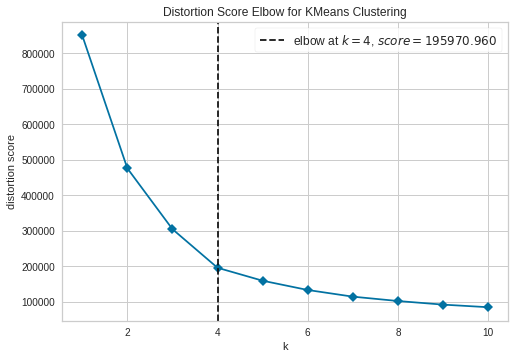

In [15]:
X_kmeans = X_pca
visualizer = KElbowVisualizer(KMeans(), k=(1,11), timings=False)
visualizer.fit(X_kmeans)
visualizer.show()

We can see that if the number of clusters is smaller than 4, the inertia has a high value. But if the number of clusters is larger than 4, the inertia is relatively constant. So we chose **4** as the optimal number of clusters.

**K-Means Clustering with the Optimal Number of Clusters**

We use the built-in KMeans clustering algorithm from skicit-learn here. The input parameters of interest for this algorithm are number of clusters and how the initial points are chosen. We set number of clusters to 4 as per previous operations, and initialize the initial centers randomly. With these settings, the kmeans algorithm will run 10 times with different centroid seeds. The final results is the best output of 10 consecutive runs in terms of inertia.<Sup>[4]<Sup>

In [16]:
kmeans = KMeans(n_clusters = 4, init = 'random')
kmeans.fit(X_kmeans)
labels = kmeans.labels_
centers_kmeans = kmeans.cluster_centers_

We concatenate the principal components and cluster labels from our algorithm to a dataframe for clarity.

In [17]:
# concatenate principal components and clusters to dataframe
df_temp = df.copy()
df_temp.reset_index(inplace=True, drop=True)
df_components = pd.DataFrame(data = X_pca, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])
df_cluster = pd.concat([df_temp, df_components], axis=1)
df_cluster['Cluster Label'] = labels 
df_cluster['Cluster Label'] = df_cluster['Cluster Label'].apply(lambda x:'first' if x==0  else 'second' if x==1 else 'third' if x==2 else 'fourth')

df_cluster.shape

(9777, 757)

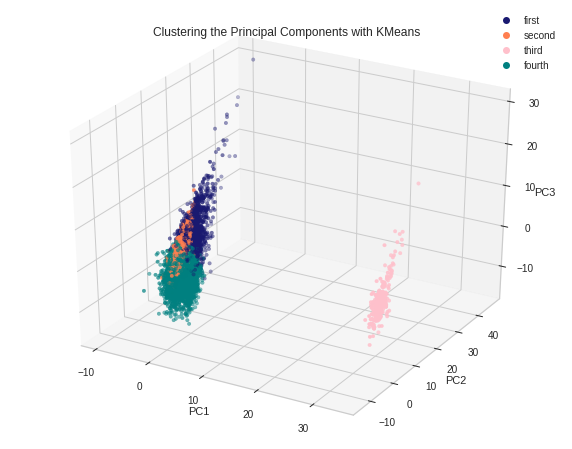

In [18]:
# plot results of clustering
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
colors = {'first' : 'midnightblue', 'second' : 'coral', 'third' : 'pink', 'fourth' : 'teal'}

x = X_kmeans[:,0]
y = X_kmeans[:,1]
z = X_kmeans[:,2]

ax.scatter(x, y, z, c = df_cluster['Cluster Label'].map(colors), marker='.', s = 50)
# ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], color = 'black', marker='o', s = 100)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ax.set_title('Clustering the Principal Components with KMeans')
markers = [plt.Line2D([0,0], [0,0], color=color, marker='o', linestyle='') for color in colors.values()]
plt.legend(markers, colors.keys(), numpoints=1)

plt.show();

We can see four distinct clusters in our dataset. The **teal** cluster seems to be most dense, followed by the **blue** and **pink** cluster. The **orange** cluster seems to be least dense. 

**2. Agglomerative Clustering**

The second clustering method we apply is **Agglomerative Hierarchical Clustering**. In general hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. For specifically agglomerative clustering, it is a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. The linkage criteria determines the metric used for the merge strategy. <Sup>[5]<Sup>

In [19]:
from sklearn.cluster import AgglomerativeClustering

**Finding Optimal Number of Clusters with Elbow Method**

Like in the first method, we use YellowBrick's KElbowVisualizer to find the optimal number of clusters for agglomerative clustering.<Sup>[6]<Sup>

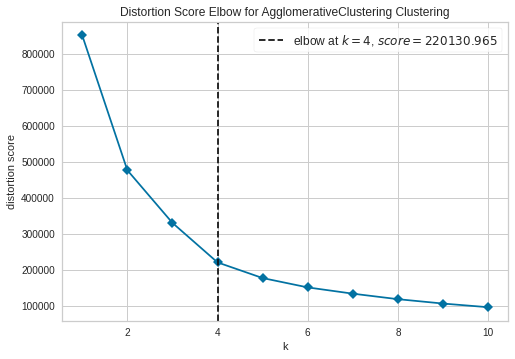

In [20]:
X_agg = X_pca
visualizer = KElbowVisualizer(AgglomerativeClustering(), k=(1,11), timings=False)
visualizer.fit(X_agg)
visualizer.show();

We can see that if the number of clusters is smaller than 4, the inertia has a high value. But if the number of clusters is larger than 4, the inertia is relatively constant. So we chose 4 as the optimal number of clusters.

**Agglomerative Clustering with Optimal Number of Clusters**

We use the built in agglomerative clustering algorithm from skicit-learn with number of clusters = 4 as per previous calculations. The other parameters we pass into our algorithm are *linkage* which in our case we use *ward* that minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach. We also specify the *affinity* paramter to be *euclidean* as the metric used to compute the linkage. <Sup>[7]<Sup>

In [21]:
agg = AgglomerativeClustering(n_clusters = 4, affinity='euclidean', linkage='ward', compute_distances=True) 
y_clust = agg.fit_predict(X_agg)

In [22]:
# concatenate principal components and clusters to dataframe
df_temp = df.copy()
df_temp.reset_index(inplace=True, drop=True)
df_components = pd.DataFrame(data = X_pca, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])
df_cluster2 = pd.concat([df_temp, df_components], axis=1)
df_cluster2['Cluster Label'] = agg.labels_ 
df_cluster2['Cluster Label'] = df_cluster2['Cluster Label'].apply(lambda x:'first' if x==0  else 'second' if x==1 else 'third' if x==2 else 'fourth')

df_cluster2.shape

(9777, 757)

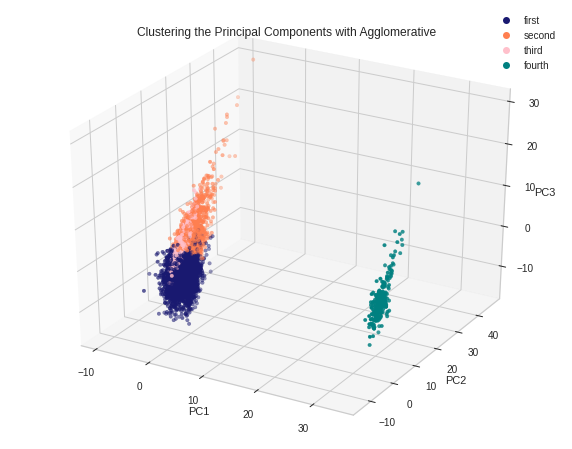

In [24]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
colors = {'first' : 'midnightblue', 'second' : 'coral', 'third' : 'pink', 'fourth' : 'teal'}

x = X_agg[:,0]
y = X_agg[:,1]
z = X_agg[:,2]

ax.scatter(x, y, z, c = df_cluster2['Cluster Label'].map(colors), marker='.', s = 50)
# ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], color = 'black', marker='o', s = 100)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ax.set_title('Clustering the Principal Components with Agglomerative')

markers = [plt.Line2D([0,0], [0,0], color=color, marker='o', linestyle='') for color in colors.values()]
plt.legend(markers, colors.keys(), numpoints=1)

plt.show();

We can see four distinct clusters in our dataset. The **blue** cluster seems to be most dense, followed by the **orange** and **teal** cluster. The **pink** cluster seems to be least dense. 

#(e) Comparative analysis of the two methods on dataset:# 

Provide a comparison between the two machine learning methods for each dataset across dimensions such as computational complexity,
performance, etc., and a final recommendation on the method that should go into production for each dataset. This comparison should include both coding cells (e.g., overlayed plots, side-by-side confusion matrices, etc.) and markdown cells for discussion.

We use two metrics to perform comparative analysis of the two learning methods/classifiers (using raw features for both):

1. Cluster Cardinality
2. Cluster Magnitude

<Sup>[8]<Sup>

**Cluster Cardinality**

Cluster cardinality is the number of examples per cluster. We investigate the distribution of samples across the four clusters for both clustering algorithms. <Sup>[9]<Sup>

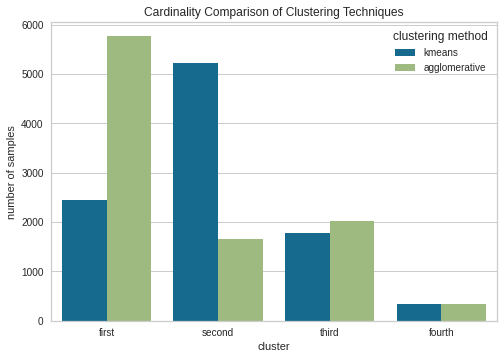

In [25]:
# cardinality comparison
kmeans_cardinality = df_cluster.groupby('Cluster Label')
agg_cardinality = df_cluster2.groupby('Cluster Label')
k_card = np.array([len(kmeans_cardinality.get_group('first')), len(kmeans_cardinality.get_group('second')), len(kmeans_cardinality.get_group('third')), len(kmeans_cardinality.get_group('fourth'))])
agg_card = np.array([len(agg_cardinality.get_group('first')), len(agg_cardinality.get_group('second')), len(agg_cardinality.get_group('third')), len(agg_cardinality.get_group('fourth'))])

df_bar = pd.DataFrame({'clustering method': ['kmeans', 'kmeans', 'kmeans', 'kmeans', 'agglomerative', 'agglomerative', 'agglomerative', 'agglomerative'],
                      'number of samples': [2442, 5226, 1778, 331, 5770, 1648, 2028, 331],
                      'cluster' : ['first', 'second', 'third', 'fourth', 'first', 'second', 'third', 'fourth']})
sns.barplot(x='cluster', y='number of samples', hue='clustering method', data=df_bar) 
plt.title('Cardinality Comparison of Clustering Techniques')
plt.show();

This graphs shows contention between the first and second classes in the two clustering algorithms. However, KMeans shows a more disproportionate distribution of samples across the four clusters than agglomerative. But we need to perform more studies to come to a concrete comparative conclusion.

**Cluster Magnitude**

Cluster magnitude is the sum of distances from all examples to the centroid of the cluster. In both algorithms, we get separate centroids for each cluster. We take the mean sum of the distances between sample point and centroid for each cluster and do a comparative study on the two algorithms. Ideally, we want smaller distance between sample and centroid as that implies more definitive clusters. <Sup>[9]<Sup>

In [26]:
# KMeans Cluster Magnitude
temp_1 = df_cluster.groupby('Cluster Label').get_group('first').loc[:, ['Principal Component 1', 'Principal Component 2', 'Principal Component 3']]
centroid_1 = centers_kmeans[0]
distances_1 = []
for idx in range(temp_1.shape[0]):
  dist = abs(centroid_1 - temp_1.iloc[idx, :])
  distances_1.append(dist) 
distances_1 = np.array(distances_1)
# print(distances_1.mean())

temp_2 = df_cluster.groupby('Cluster Label').get_group('second').loc[:, ['Principal Component 1', 'Principal Component 2', 'Principal Component 3']]
centroid_2 = centers_kmeans[1]
distances_2 = []
for idx in range(temp_2.shape[0]):
  dist = abs(centroid_2 - temp_2.iloc[idx, :])
  distances_2.append(dist)
distances_2 = np.array(distances_2)
# print(distances_2.mean())

temp_3 = df_cluster.groupby('Cluster Label').get_group('third').loc[:, ['Principal Component 1', 'Principal Component 2', 'Principal Component 3']]
centroid_3 = centers_kmeans[2]
distances_3 = []
for idx in range(temp_3.shape[0]):
  dist = abs(centroid_3 - temp_3.iloc[idx, :])
  distances_3.append(dist)
distances_3 = np.array(distances_3)
# print(distances_3.mean())

temp_4 = df_cluster.groupby('Cluster Label').get_group('fourth').loc[:, ['Principal Component 1', 'Principal Component 2', 'Principal Component 3']]
centroid_4 = centers_kmeans[3]
distances_4 = []
for idx in range(temp_4.shape[0]):
  dist = abs(centroid_4 - temp_4.iloc[idx, :])
  distances_4.append(dist)
distances_4 = np.array(distances_4)
# print(distances_4.mean())

k_dist_avg = np.array([distances_1.mean(), distances_2.mean(), distances_3.mean(), distances_4.mean()])
print(f'Average distances for kmeans clustering: {k_dist_avg}')

Average distances for kmeans clustering: [2.22944349 1.45653462 1.67321198 1.9123121 ]


**Note:** sklearn's AgglomerativeClustering algorithm does not have a centroid/center parameter. So, we use the **NearestCentroid** function from sklearn.neighbors to compute the centroids from the clusters made by the agglomerative algorithm. <Sup>[10]<Sup>

In [27]:
from sklearn.neighbors import NearestCentroid

In [28]:
nearest_centroids = NearestCentroid()
nearest_centroids.fit(X_agg, y_clust)
centers_agg = nearest_centroids.centroids_

In [29]:
# Agglomerative Cluster Magnitude
temp_1 = df_cluster2.groupby('Cluster Label').get_group('first').loc[:, ['Principal Component 1', 'Principal Component 2', 'Principal Component 3']]
centroid_1 = centers_agg[0]
distances_1 = []
for idx in range(temp_1.shape[0]):
  dist = abs(centroid_1 - temp_1.iloc[idx, :])
  distances_1.append(dist) 
distances_1 = np.array(distances_1)
# print(distances_1.mean())

temp_2 = df_cluster2.groupby('Cluster Label').get_group('second').loc[:, ['Principal Component 1', 'Principal Component 2', 'Principal Component 3']]
centroid_2 = centers_agg[1]
distances_2 = []
for idx in range(temp_2.shape[0]):
  dist = abs(centroid_2 - temp_2.iloc[idx, :])
  distances_2.append(dist)
distances_2 = np.array(distances_2)
# print(distances_2.mean())

temp_3 = df_cluster2.groupby('Cluster Label').get_group('third').loc[:, ['Principal Component 1', 'Principal Component 2', 'Principal Component 3']]
centroid_3 = centers_agg[2]
distances_3 = []
for idx in range(temp_3.shape[0]):
  dist = abs(centroid_3 - temp_3.iloc[idx, :])
  distances_3.append(dist)
distances_3 = np.array(distances_3)
# print(distances_3.mean())

temp_4 = df_cluster2.groupby('Cluster Label').get_group('fourth').loc[:, ['Principal Component 1', 'Principal Component 2', 'Principal Component 3']]
centroid_4 = centers_agg[3]
distances_4 = []
for idx in range(temp_4.shape[0]):
  dist = abs(centroid_4 - temp_4.iloc[idx, :])
  distances_4.append(dist)
distances_4 = np.array(distances_4)
# print(distances_4.mean())

agg_dist_avg = np.array([distances_1.mean(), distances_2.mean(), distances_3.mean(), distances_4.mean()])
print(f'Average distances for agglomerative clustering: {agg_dist_avg}')

Average distances for agglomerative clustering: [2.07813326 2.18548086 1.37119602 1.67321198]


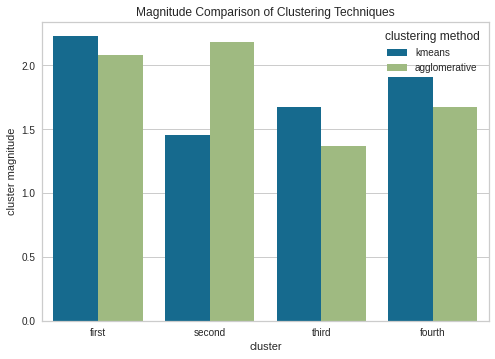

In [30]:
# comparison plot for cluster magnitude of the two algorithms

df_bar_2 = pd.DataFrame({'clustering method': ['kmeans', 'kmeans', 'kmeans', 'kmeans', 'agglomerative', 'agglomerative', 'agglomerative', 'agglomerative'],
                      'cluster magnitude': [k_dist_avg[0], k_dist_avg[1], k_dist_avg[2], k_dist_avg[3], agg_dist_avg[0], agg_dist_avg[1], agg_dist_avg[2], agg_dist_avg[3]],
                      'cluster' : ['first', 'second', 'third', 'fourth', 'first', 'second', 'third', 'fourth']})
sns.barplot(x='cluster', y='cluster magnitude', hue='clustering method', data=df_bar_2) 
plt.title('Magnitude Comparison of Clustering Techniques')
plt.show();

This graph clearly shows that the cluster magnitude of agglomerative clustering is a lot smaller than that of KMeans clustering. This implies that the Agglomerative Clustering algorithm makes more definitive clusters than that of KMeans.

**Conclusion:** Based on the aforementioned analyses, for optimal cluster number 4 on this particular dataset, *Agglomerative Hierarchical Clustering* seems to work better than KMeans Clustering. But this conclusion is very dataset dependent.

#(f) Discussion on ethical issues for dataset/task:# 
Provide a discussion on the ethical aspects of the machine learning tasks that you carried out on the declared datasets. This discussion should be carried out in a markdown cell and should be carefully formatted for readability purposes.

Ethics and bias are important aspects to consider in any Machine Learning task. But specifically in tasks like clustering which involves using health and social information of subjects and analyzing them, the matters of ethics and bias become more significant.

Some very important aspects to consider for any clustering task for/with health related data are listed below:

1. **Research Subjects:** For studies on identifying diseases with health data, the natural subjects to use are human beings. However, therein lies the ethical dilemma with the study. The first dilemma lies is deciding who counts as a research subject, i.e. whose data to use to train the model. When trying to make a generalizable clustering model, balanced diversity and variance in the sample size of subjects becomes of utmost importance. Any bias present in the subject pool will result in the model also being biased. For example, having more data on middle-aged white men will make the clustering model biased to that specific demographic. And such bias may pertain to race, sex, ethnicity, etc. Therefore, represented demographics in the research subjects is an ethical concern. <Sup>[11]<Sup>

2. **Consent:** The dataset used for this task includes demographic, socioeconomic, dietary, and health-related data. It also consists of medical, dental, and physiological measurements, as well as laboratory tests administered by highly trained medical personnel. All these come under the jurisdiction of HIPAA laws. That is, consent is required for the engineers to include such information in the dataset and use it for the model. Any information included without permission of the subject goes against ethics in Machine Learning. <Sup>[11][12]<Sup>

3. **Clinical Equipoise:** The ethical principle of clinical equipoise protects the beneficence of patients and prevents unnecessarily harming them. When collecting information for the dataset, it has been mentioned that certain lab tests are administered. It is very important to promote the good of the patient above all else in these tests, that is to not conduct the test(s) is that in any way poses harm to them. <Sup>[11][13]<Sup>

4. **Vulnerable Communities:** This ethical concern ties in well with the first point we mentioned. There are marginalized communities who are grossly underrepresented in such studies and experiments. It is necessary to be mindful of including them in the subject pool in order to diversify the dataset and ensure a generalizable, unbiased clustering model. <Sup>[11]<Sup>

#(g) Bibliography for each notebook:#
Provide bibliographic references that helped you during the preparation of the notebook. These references, which should be provided in a markdown cell at the end of the notebook, should be referenced within the body markdown cells of each notebook as much as possible.

1. “2.3. Clustering.” Scikit-learn, scikit-learn/stable/modules/clustering.html. Accessed 17 Dec. 2022. URL: https://scikit-learn.org/stable/modules/clustering.html#k-means 

2. Baruah, Indraneel Dutta. “Cheat Sheet for Implementing 7 Methods for Selecting the Optimal Number of Clusters in Python.” Medium, 21 July 2021, https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad 

3. “Elbow Method &Mdash; Yellowbrick v1.5 Documentation.” Elbow Method &Mdash; Yellowbrick v1.5 Documentation, www.scikit-yb.org/en/latest/api/cluster/elbow.html. Accessed 17 Dec. 2022. URL: https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

4. “sklearn.cluster.KMeans.” Scikit-learn, scikit-learn/stable/modules/generated/sklearn.cluster.KMeans.html. Accessed 17 Dec. 2022. URL: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html 

5. “2.3.6 Hierarchical Clustering.” Scikit-learn, scikit-learn/stable/modules/clustering.html. Accessed 17 Dec. 2022. URL: https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering 

6. Alam, Bashir. “Implementation of Hierarchical Clustering Using Python.” Hands-On-Cloud, 30 Jan. 2022, hands-on.cloud/implementation-of-hierarchical-clustering-using-python. URL: https://hands-on.cloud/implementation-of-hierarchical-clustering-using-python/ 

7. “Sklearn.Cluster.AgglomerativeClustering.” Scikit-learn, scikit-learn/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html. Accessed 17 Dec. 2022. URL: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering 

8. Chatterjee, ishika. “A Comparative Study of Clustering Algorithms.” Medium, 22 Oct. 2019, medium.com/analytics-vidhya/comparative-study-of-the-clustering-algorithms-54d1ed9ea732. URL: https://medium.com/analytics-vidhya/comparative-study-of-the-clustering-algorithms-54d1ed9ea732 

9. “Interpret Results and Adjust Clustering | Machine Learning | Google Developers.” Google Developers, developers.google.com/machine-learning/clustering/interpret. Accessed 17 Dec. 2022. URL: https://developers.google.com/machine-learning/clustering/interpret 

10. “How to Get Agglomerative Clustering ‘Centroid’ in Python Scikit-learn.” Stack Overflow, 5 June 2019. URL: https://stackoverflow.com/questions/56456572/how-to-get-agglomerative-clustering-centroid-in-python-scikit-learn 

11. Weijer, Charles, et al. “Ethical Issues Posed by Cluster Randomized Trials in Health Research - Trials.” BioMed Central, 20 Apr. 2011, trialsjournal.biomedcentral.com/articles/10.1186/1745-6215-12-100. URL: https://trialsjournal.biomedcentral.com/articles/10.1186/1745-6215-12-100#Sec4 

12. “NHANES - About the National Health and Nutrition Examination Survey.” NHANES - About the National Health and Nutrition Examination Survey, 15 Nov. 2022. URL: https://www.cdc.gov/Nchs/Nhanes/about_nhanes.htm 

13. “Clinical Equipoise - Wikipedia.” Clinical Equipoise - Wikipedia, 11 June 2018. URL: https://en.wikipedia.org/wiki/Clinical_equipoise 